# Чи слід перерозподілити простір для авто на Хрещатику?

Цей пост є частиною обговорення проєкту майбутнього капітального ремонту вулиці Хрещатик в Києві. Він не претендує на вичерпну відповідь на питання про те, якою має бути ця вулиця. Я лише розгляну поточний стан справ та перспективи ["дорожньої дієти"](https://en.wikipedia.org/wiki/Road_diet) з точки зору автомобільного руху.

Використовуватимуться дані [Uber Movement](https://movement.uber.com/explore/kyiv/speeds/query) за $2019$ рік.

Цей пост буде оновлено після прийняття остаточного рішення про те, яким саме буде Хрещатик після капремонту. Я також збираюсь проаналізувати наслідки змін (якщо вони будуть) після фізичного завершення робіт.

In [1]:
#моя бібліотека для роботи з даними уберу
#https://github.com/DmytroTym/urban/blob/master/urban_lib.py
from urban_lib import Uber_movement_data

In [2]:
Khreshchatyk = Uber_movement_data()

Khreshchatyk_area = [(30.527610, 50.453844), (30.527610, 50.453844), (30.520322, 50.447964),
                     (30.519194, 50.445028), (30.518090, 50.442052), (30.52264, 50.440583),
                     (30.522987, 50.442162), (30.521499, 50.444720), (30.522776, 50.448556),
                     (30.526966, 50.451548), (30.529718, 50.449859), (30.530536, 50.450387)]

#попередньо було відфільтровано всі дані, завантажується вже файл після фільтрування
Khreshchatyk.load_filtered_from_file('movement-speeds-hourly-2019-Khreshchatyk.csv',
                                     area_verts = Khreshchatyk_area)
Khreshchatyk.node_coords_from_area()

In [15]:
import matplotlib.pyplot as plt
import numpy as np

#тут лише візуалізація; всі дії, потрібні для отримання швидкостей, відбуваються в бібліотеці
def plot_speeds(road_ids, from_node, to_node):
    avg_speeds = Khreshchatyk.avg_speed_from_ids(road_ids)
    days = set([k[0] for k in avg_speeds])
    for day in days:
        avg_speeds_this_day = {k: v for k, v in avg_speeds.items() if k[0] == day}
        plt.plot([k[1] for k in avg_speeds_this_day],
                 list(avg_speeds_this_day.values()), '.-', alpha = 0.05, color = 'blue')
    plt.plot(list(range(24)), [np.mean([v for k, v in avg_speeds.items() if k[1] == hour])\
                               for hour in range(24)],
             '.-', color = 'black', label = "Середня по всіх днях швидкість")
    plt.title("Погодинні швидкості на відрізку Хрещатику\n від {} до {}\n у будні дні 2019 року".
              format(from_node, to_node), fontsize = 18)
    plt.legend(loc = 'upper right')
    plt.xticks(ticks = list(range(24)))
    plt.xlabel("Година дня")
    plt.ylabel("Швидкість, км/год")
    plt.show()

In [16]:
Euro_Maidan_nodes = ([599414035, 6421716232, 4352743502, 2663517058, 1605526714],
                     "Європейської площі", "Майдану Незалежності")
Maidan_Pro_nodes = ([1605526714, 6335159207, 4898229414, 599413919],
                    "Майдану Незалежності", "вулиці Прорізної")
Pro_Khme_nodes = ([599413919, 599413918],
                  "вулиці Прорізної", "вулиці Хмельницького")
Khme_Bes_nodes = ([599413918, 4753035462, 2072071507, 3294825443, 599413915, 5433718714],
                  "вулиці Хмельницького", "Бесарабської площі")
Bes_Khme_nodes = ([5433718714, 599413915, 3294825443, 2072071507, 4753035462, 599413918],
                  "Бесарабської площі", "вулиці Хмельницького")
Khme_Pro_nodes = ([599413918, 599413919],
                  "вулиці Хмельницького", "вулиці Прорізної")
Pro_Maidan_nodes = ([599413919, 4898229414, 6335159207, 1605526714], 
                    "вулиці Прорізної", "Майдану Незалежності")
Maidan_Euro_nodes = ([1605526714, 2663517058, 4352743502, 6421716232, 599414035], 
                     "Майдану Незалежності", "Європейської площі")

In [17]:
from urban_lib import Visualizer

Visualizer.set_style()

## Хрещатик в напрямку від Європейської площі до Бесарабки

На наступних чотирьох графіках зображено, якими протягом минулого року були швидкості на відрізках Хрещатику між Європейською площею, Майданом Незалежності, вулицями Прорізною, Хмельницького та Бесарабською площею - на кожен відрізок по графіку. Синіми лініями на графіках показана середня швидкість проїзду відрізку в залежності від години дня в певний будній день $2019$ року. Чорною лінією - усереднена по всіх будніх днях швидкість залежно від години дня.

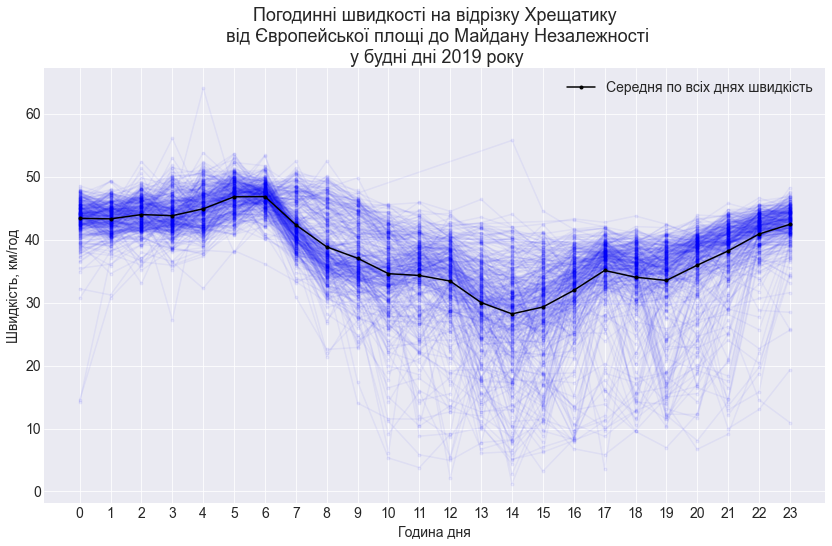

In [18]:
plot_speeds(*Euro_Maidan_nodes)

Найцікавіше на цьому графіку - відсутність ранкових або вечірніх "піків". Можна припустити, що причина цього - те, що через Європейську площу на Хрещатик фізично не можуть проїхати дуже багато авто. Дійсно, світлофор на площі "дозує" трафік з двох вулиць, значно вужчих за Хрещатик - Володимирьского узвозу та вулиці Грушевського. Тим не менш, вуличне паркування на цьому відрізку заборонене, а після капремонту планується так само залишити праву смугу смугою руху. З огляду на дані, це здається помилкою. Найімовірніше, принаймні одну смугу тут можна виділити на велоінфраструктуру, смугу ГТ або вуличне паркування, не сильно уповільнивши рух авто.

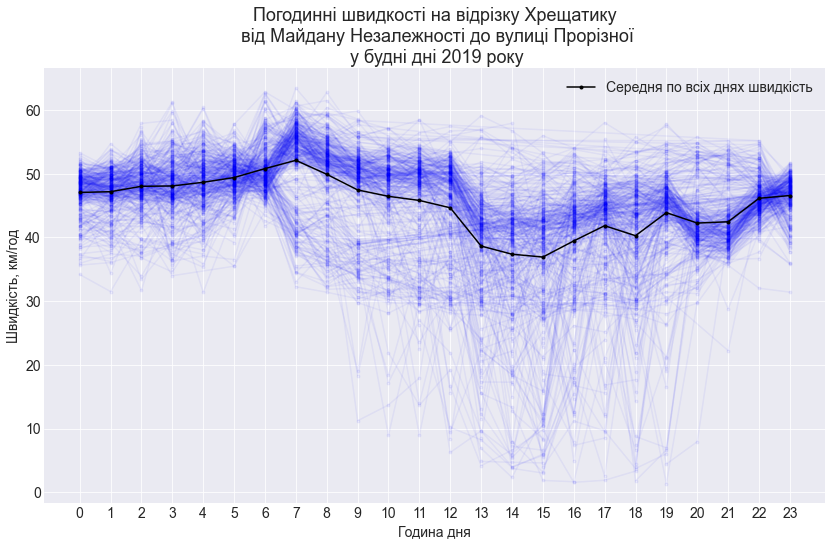

In [19]:
plot_speeds(*Maidan_Pro_nodes)

Аналогічні до минулого відрізку висновки.

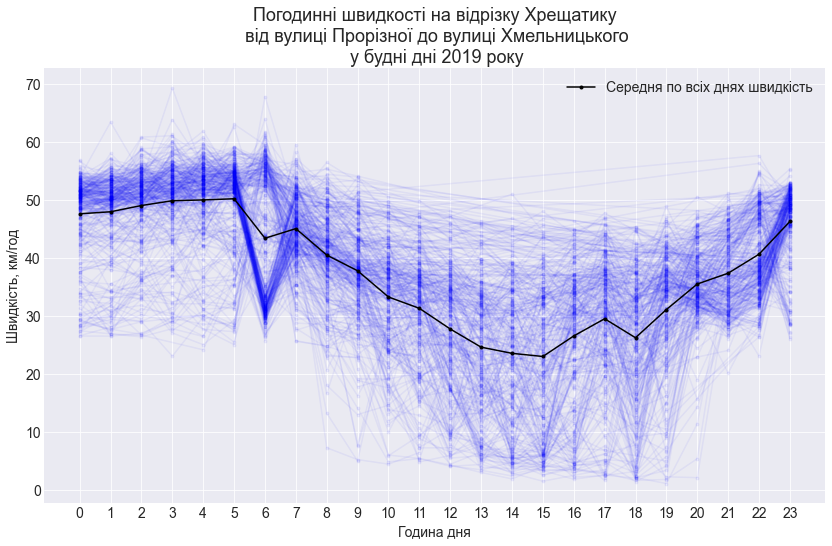

In [20]:
plot_speeds(*Pro_Khme_nodes)

Аналогічні до першого відрізку висновки. Видно аномалію в районі $6$ ранку. Як її пояснити, я не знаю (можливо, в цей час Хрещатиком регулярно їздить якись кортеж?).

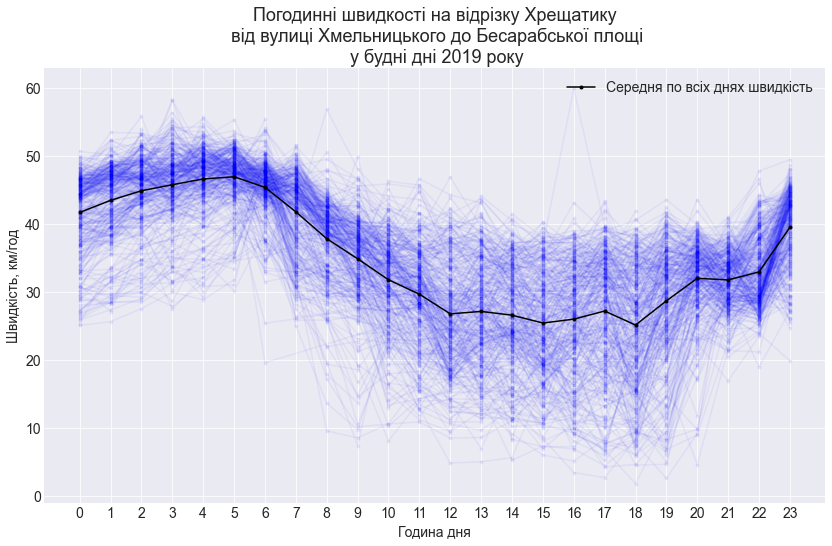

In [21]:
plot_speeds(*Khme_Bes_nodes)

Аналогічні до першого відрізку висновки.

## Хрещатик в напрямку від Бесарабки до Європейської площі

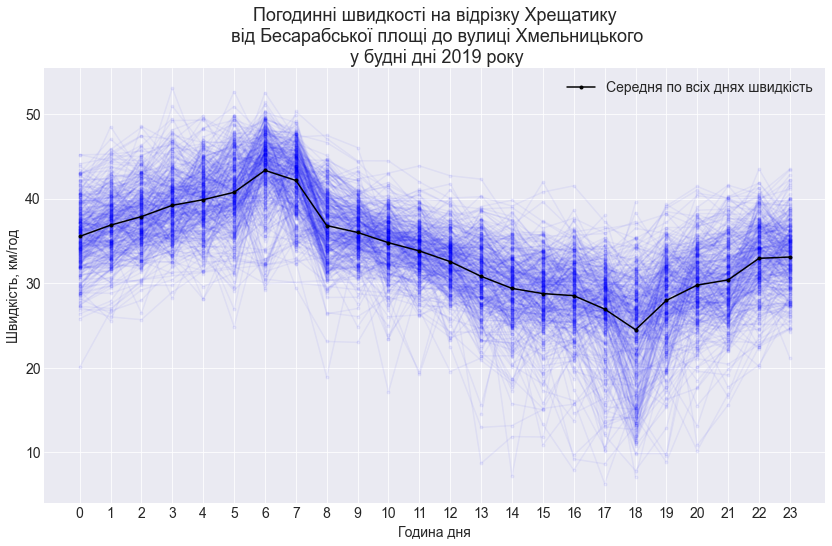

In [36]:
plot_speeds(*Bes_Khme_nodes)

Тут вже видно вечірній пік о $6$ годині, хоча він і не є навіть близько таким інтенсивним, як в цілому в місті.

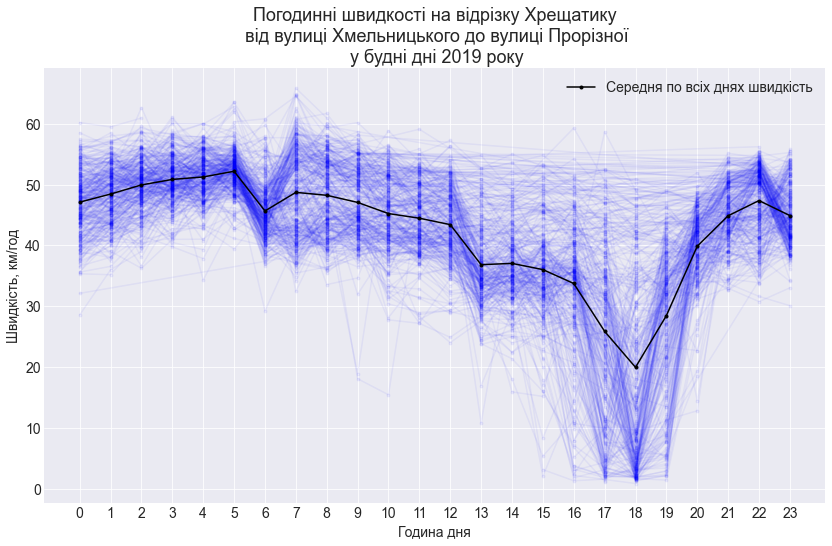

In [37]:
plot_speeds(*Khme_Pro_nodes)

Дуже яскравий вечірній пік.

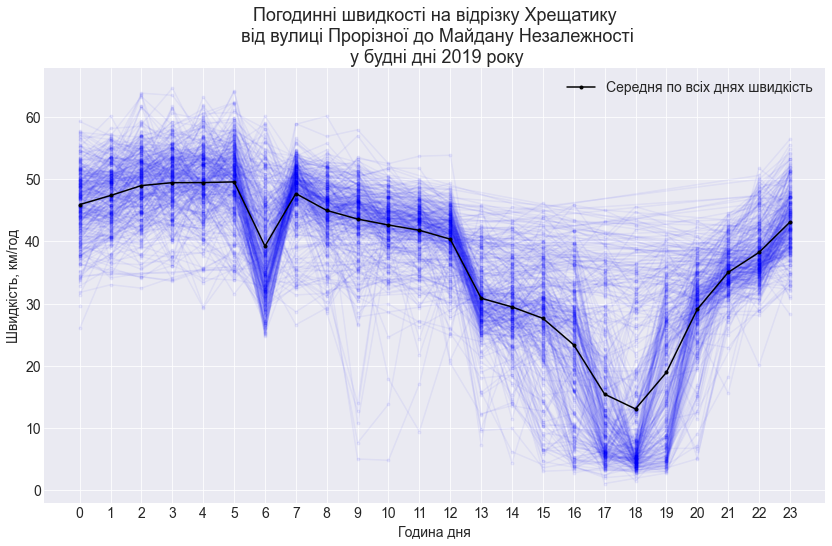

In [38]:
plot_speeds(*Pro_Maidan_nodes)

Дуже яскравий вечірній пік.

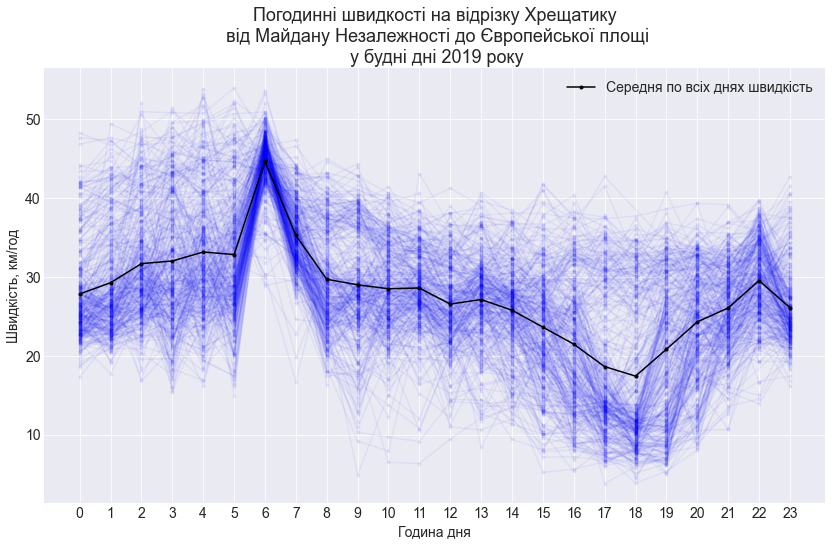

In [39]:
plot_speeds(*Maidan_Euro_nodes)

Окрім явної аномалії о $6$ ранку, бачимо також певне пом'якшення вечірнього піку. Це пом'якшення наштовхує на думку, що (принаймні часково) трафік на Хрещатику "тримає" світлофор на Майдані Незалежності.

## Висновки

По всій парній стороні Хрещатика (від Європейської до Бесарабської площі) майже немає суттєвих уповільнень руху в "пікові години". Це потенційно дозволяє зменшити кількість смуг для руху авто в цьому напрямку, використавши дорогоцінний простір інакше і при цьому не збільшивши затримки для авто помітно.

Відрізок Хрещатику від Бесарабської площі до вулиці Хмельницького також не є завантаженим і тому рух тут не постраждає сильно від зміни функції принаймні однієї смуги. Але на непарній частині Хрещатику від Хмельницького до Європейської площі є серйозні затримки в годину "пік". Тут складно передбачити результат зменшення кількості смуг. 

Дякую за увагу!